**k-means Clustering:**

In [65]:
import pandas as pd
# class_majority_df=pd.read_csv('DataSets/car_evaluation_majority.csv')
class_majority_df=pd.read_csv('DataSets/FastTagFraud_majority_df.csv')

In [66]:
import pandas as pd
columns=['Kmeans','Kmeans++','Minibatch']
clustering_result=pd.DataFrame(columns=columns)

In [67]:
num_of_clusters=7

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_k

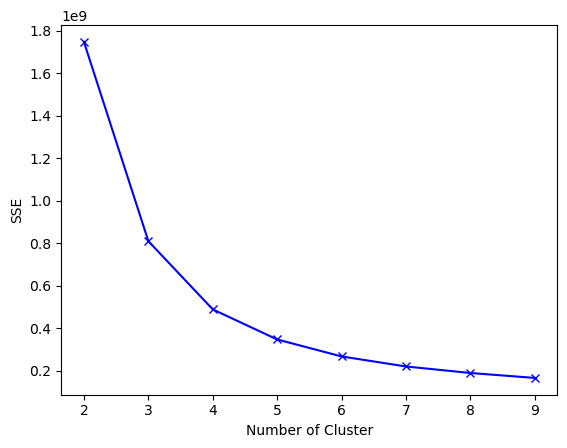

In [68]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
sse={}
for k in range(2,10):
  kmeans=KMeans(n_clusters=k,init='random',max_iter=500).fit(class_majority_df)
  sse[k]=kmeans.inertia_
plt.plot(list(sse.keys()),list(sse.values()),'bx-')
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.savefig("elbow_method.png")

In [69]:
kmeans=KMeans(n_clusters=7,init='random',max_iter=500).fit(class_majority_df)
clustering_result['Kmeans']=kmeans.labels_

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [70]:
partition1 = class_majority_df
partition1=partition1.reset_index(drop=True)
partition1['cluster_label'] = clustering_result['Kmeans']
partition1 #with cluster labels

,Unnamed: 0,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Month,Day,Hour,result,cluster_label
0,3171,3,1,0,130,130,39,6,6,11,0,6
1,450,2,1,2,0,0,45,18,6,19,0,1
2,3588,5,0,0,340,340,65,27,1,1,0,6
3,2311,1,1,2,90,90,77,25,2,11,0,2
4,4136,4,0,1,110,110,55,7,6,12,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3211,122,5,0,0,350,350,49,11,3,10,0,1
3212,4108,4,0,1,110,110,67,7,6,12,0,3
3213,240,2,1,2,0,0,50,9,4,9,0,1
3214,2071,3,1,0,145,145,92,12,4,22,0,4


**KMeans++ Clustering:**

In [71]:
kmeans=KMeans(n_clusters=num_of_clusters,init='k-means++',max_iter=500).fit(class_majority_df)
clustering_result['Kmeans++']=kmeans.labels_

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [72]:

partition2 = class_majority_df
partition2=partition2.reset_index(drop=True)
partition2['cluster_label'] = clustering_result['Kmeans++']
partition2 #with cluster labels

,Unnamed: 0,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Month,Day,Hour,result,cluster_label
0,3171,3,1,0,130,130,39,6,6,11,0,3
1,450,2,1,2,0,0,45,18,6,19,0,4
2,3588,5,0,0,340,340,65,27,1,1,0,3
3,2311,1,1,2,90,90,77,25,2,11,0,0
4,4136,4,0,1,110,110,55,7,6,12,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3211,122,5,0,0,350,350,49,11,3,10,0,4
3212,4108,4,0,1,110,110,67,7,6,12,0,1
3213,240,2,1,2,0,0,50,9,4,9,0,4
3214,2071,3,1,0,145,145,92,12,4,22,0,6


**K-Modes Clustering:**

In [73]:
%pip install kmodes

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:

from kmodes.kmodes import KModes


km = KModes(n_clusters=num_of_clusters, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(class_majority_df)

df_0_centroids=km.cluster_centroids_
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 776, cost: 20621.0
Run 1, iteration: 2/100, moves: 42, cost: 20621.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 814, cost: 20460.0
Run 2, iteration: 2/100, moves: 155, cost: 20459.0
Run 2, iteration: 3/100, moves: 0, cost: 20459.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 101, cost: 21375.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 748, cost: 20259.0
Run 4, iteration: 2/100, moves: 61, cost: 20259.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 294, cost: 20260.0
Best run was number 4


array([1, 0, 1, ..., 0, 0, 6], dtype=uint16)

In [75]:

partition3 = class_majority_df
partition3=partition3.reset_index(drop=True)
partition3['cluster_label'] = clusters
partition3 #with cluster labels

,Unnamed: 0,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Month,Day,Hour,result,cluster_label
0,3171,3,1,0,130,130,39,6,6,11,0,1
1,450,2,1,2,0,0,45,18,6,19,0,0
2,3588,5,0,0,340,340,65,27,1,1,0,1
3,2311,1,1,2,90,90,77,25,2,11,0,2
4,4136,4,0,1,110,110,55,7,6,12,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3211,122,5,0,0,350,350,49,11,3,10,0,1
3212,4108,4,0,1,110,110,67,7,6,12,0,3
3213,240,2,1,2,0,0,50,9,4,9,0,0
3214,2071,3,1,0,145,145,92,12,4,22,0,0


**MINIBATCH KMEANS CLUSTERING:**

In [76]:
from sklearn.cluster import MiniBatchKMeans
mbk = MiniBatchKMeans(init='k-means++', n_clusters=num_of_clusters, batch_size=40, n_init=10, max_no_improvement=10, verbose=0)
mbk.fit(class_majority_df)
clustering_result['Minibatch']=mbk.labels_

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [77]:

clustering_result['Minibatch'].values

array([6, 0, 6, ..., 0, 2, 3])

In [78]:
partition4 = class_majority_df
partition4=partition4.reset_index(drop=True)
partition4['cluster_label'] = clustering_result['Minibatch']
partition4

,Unnamed: 0,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Month,Day,Hour,result,cluster_label
0,3171,3,1,0,130,130,39,6,6,11,0,6
1,450,2,1,2,0,0,45,18,6,19,0,0
2,3588,5,0,0,340,340,65,27,1,1,0,6
3,2311,1,1,2,90,90,77,25,2,11,0,2
4,4136,4,0,1,110,110,55,7,6,12,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3211,122,5,0,0,350,350,49,11,3,10,0,0
3212,4108,4,0,1,110,110,67,7,6,12,0,1
3213,240,2,1,2,0,0,50,9,4,9,0,0
3214,2071,3,1,0,145,145,92,12,4,22,0,2


**Fuzzy K-Means Clustering**

In [79]:

%pip install fuzzy-c-means
import numpy as np
from fcmeans import FCM


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:

fcm = FCM(n_clusters=num_of_clusters)
fcm.fit(class_majority_df.values)
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(class_majority_df.values)
fcm_labels

array([1, 0, 1, ..., 0, 2, 3], dtype=int64)

In [81]:

partition5 = class_majority_df
partition5=partition5.reset_index(drop=True)
partition5['cluster_label'] = fcm_labels
partition5

,Unnamed: 0,Vehicle_Type,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Month,Day,Hour,result,cluster_label
0,3171,3,1,0,130,130,39,6,6,11,0,1
1,450,2,1,2,0,0,45,18,6,19,0,0
2,3588,5,0,0,340,340,65,27,1,1,0,1
3,2311,1,1,2,90,90,77,25,2,11,0,4
4,4136,4,0,1,110,110,55,7,6,12,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3211,122,5,0,0,350,350,49,11,3,10,0,0
3212,4108,4,0,1,110,110,67,7,6,12,0,6
3213,240,2,1,2,0,0,50,9,4,9,0,0
3214,2071,3,1,0,145,145,92,12,4,22,0,2


In [82]:
partition1, partition2, partition3, partition4,partition5

(      Unnamed: 0  Vehicle_Type  Lane_Type  Vehicle_Dimensions  \
 0           3171             3          1                   0   
 1            450             2          1                   2   
 2           3588             5          0                   0   
 3           2311             1          1                   2   
 4           4136             4          0                   1   
 ...          ...           ...        ...                 ...   
 3211         122             5          0                   0   
 3212        4108             4          0                   1   
 3213         240             2          1                   2   
 3214        2071             3          1                   0   
 3215        4386             5          0                   0   
 
       Transaction_Amount  Amount_paid  Vehicle_Speed  Month  Day  Hour  \
 0                    130          130             39      6    6    11   
 1                      0            0             45   

In [83]:
c = 0
for i in range(len(partition1.cluster_label)):
  print(partition1.cluster_label[i], partition2.cluster_label[i], partition3.cluster_label[i],partition4.cluster_label[i],partition5.cluster_label[i])

6 3 1 6 1
1 4 0 0 0
6 3 1 6 1
2 0 2 2 4
3 1 3 1 6
1 4 1 0 0
2 0 0 5 4
4 6 6 2 2
3 1 1 1 6
4 6 1 2 4
4 6 3 4 2
3 1 2 1 6
2 0 0 2 4
5 2 1 4 5
6 3 1 6 1
6 3 1 6 1
1 4 6 0 0
0 5 2 3 3
1 4 3 0 0
6 3 0 6 1
3 1 1 1 6
4 6 2 2 2
5 2 2 4 5
3 1 3 1 6
4 6 1 2 2
0 5 3 3 3
2 0 0 2 4
1 4 4 0 0
1 4 1 0 0
0 5 1 3 3
1 4 1 0 5
1 4 2 0 0
4 6 6 2 2
2 0 4 5 4
1 4 0 0 0
5 2 0 4 5
6 3 3 6 1
1 4 2 0 0
0 5 0 3 3
5 2 0 4 5
0 5 2 3 3
6 3 3 6 1
2 0 0 5 4
6 3 2 6 1
6 3 3 6 1
0 5 5 3 3
0 5 3 3 3
1 4 0 0 0
1 4 4 0 0
1 4 0 0 0
5 2 4 4 5
5 2 1 4 5
6 3 1 6 1
3 1 6 1 6
6 3 0 6 1
3 1 0 1 6
5 2 0 4 2
2 0 0 5 4
1 4 6 0 0
4 6 6 2 2
6 1 0 1 6
0 5 1 3 3
3 1 1 1 6
4 6 2 2 2
3 1 6 1 6
2 0 3 5 4
4 6 0 4 2
1 4 5 0 0
3 1 4 1 6
1 4 1 0 0
0 5 1 3 3
1 4 0 0 0
6 3 3 6 1
4 6 6 2 2
1 4 2 0 0
2 0 0 5 4
1 4 0 0 0
2 0 0 5 4
2 0 5 5 4
5 2 0 0 5
1 4 3 0 0
1 4 0 0 0
2 0 0 2 4
2 0 1 5 4
4 6 6 4 2
6 3 0 6 1
2 0 2 5 4
6 3 1 6 1
0 5 1 3 3
4 6 0 2 2
1 4 3 0 0
1 4 2 0 0
6 3 6 6 1
2 0 2 5 4
1 4 2 0 0
3 1 3 1 6
3 1 1 1 6
4 6 3 2 2
0 5 6 3 3
5 2 5 4 5


**davies_bouldin_score**

In [84]:
from sklearn.metrics import davies_bouldin_score
print("Kmeans (partition 1): ",davies_bouldin_score(class_majority_df, partition1.cluster_label))
print("Kmeans++ (partition 2): ",davies_bouldin_score(class_majority_df, partition2.cluster_label))
print("KModes (partition 3): ",davies_bouldin_score(class_majority_df, partition3.cluster_label))
print("Minibatch Kmeans (partition 4): ",davies_bouldin_score(class_majority_df, partition4.cluster_label))
print("Fuzzy K-means(partition 5): ",davies_bouldin_score(class_majority_df, partition5.cluster_label))

Kmeans (partition 1):  0.6943622746235437
Kmeans++ (partition 2):  0.6948862143656834
KModes (partition 3):  47.50768513120702
Minibatch Kmeans (partition 4):  0.6989584531616956
Fuzzy K-means(partition 5):  0.6964925964064934
